<a href="https://www.kaggle.com/code/ricksan4ez/clustering-and-predicting-customers-pca?scriptVersionId=94954952" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<font face="Helvetica, sans-serif" size="5px" color="#34baeb">Import Libraries</font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


<font face="Helvetica, sans-serif" size="5px" color="#34baeb">Reading and Previewing Dataset</font>

In [2]:
dataset = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
dataset.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


<font face="Helvetica, sans-serif" size="5px" color="#34baeb">Getting some info about the data</font>

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<font face="Helvetica, sans-serif" size="5px" color="#34baeb">Some visualisations to preview probable correlations</font>

<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

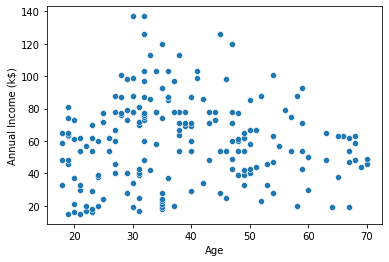

In [5]:
sns.scatterplot(data=dataset, x='Age', y='Annual Income (k$)')

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

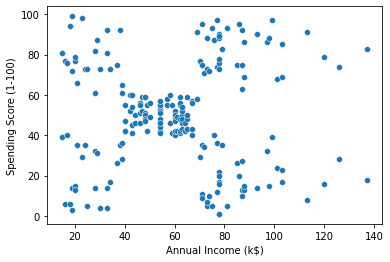

In [6]:
sns.scatterplot(data=dataset, x='Annual Income (k$)', y='Spending Score (1-100)')

<AxesSubplot:xlabel='Gender', ylabel='Spending Score (1-100)'>

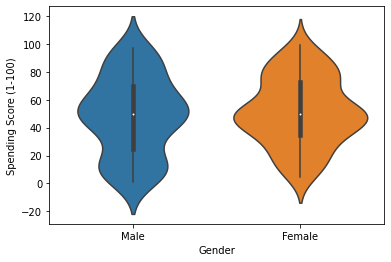

In [7]:
sns.violinplot(data=dataset, x='Gender', y='Spending Score (1-100)')

<font face="Helvetica, sans-serif" size="5px" color="#34baeb">Encoding Categorical Values</font>

In [8]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
dataset['Gender'] = lb.fit_transform(dataset['Gender'].values)
dataset.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6


In [9]:
X = dataset.iloc[:, 1:].values

<font face="Helvetica, sans-serif" size="5px" color="#34baeb">Finding the rigth number of clusters</font>

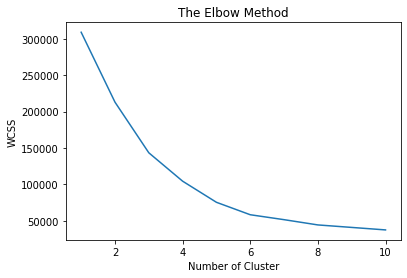

In [10]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')
plt.show()

In [11]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_means = kmeans.fit_predict(X)
y_means

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 3,
       0, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 1, 3, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

<font face="Helvetica, sans-serif" size="5px" color="#34baeb">Concatenating array to train model prdeict the customer cluster</font>

In [12]:
dataset_with_customer_segments = pd.DataFrame(np.column_stack((X, y_means)), columns=['Gender', 'Age',
                                                                              'Annual Income (k$)',
                                                                              'Spending Score (1-100)',
                                                                              'Customer Segment'])
dataset_with_customer_segments.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100),Customer Segment
0,1,19,15,39,0
1,1,21,15,81,4
2,0,20,16,6,0
3,0,23,16,77,4
4,0,31,17,40,0
5,0,22,17,76,4
6,0,35,18,6,0
7,0,23,18,94,4
8,1,64,19,3,0
9,0,30,19,72,4


<font face="Helvetica, sans-serif" size="5px" color="#34baeb">Getting the dependent and independent variables</font>

In [13]:
X = dataset_with_customer_segments.iloc[:, :-1].values
y = dataset_with_customer_segments.iloc[:, -1].values

<font face="Helvetica, sans-serif" size="5px" color="#34baeb">Splitting dataset to train and test:)</font>

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

<font face="Helvetica, sans-serif" size="5px" color="#34baeb">Creating KNN classifier</font>

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

<font face="Helvetica, sans-serif" size="5px" color="#34baeb">Testing the classifier</font>

In [16]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = knn, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 96.88 %
Standard Deviation: 4.19 %


<font face="Helvetica, sans-serif" size="5px" color="#34baeb">Applying PCA</font>

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

<font face="Helvetica, sans-serif" size="5px" color="#34baeb">Creating new classifier</font>

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn_with_pca = KNeighborsClassifier(n_neighbors=5)

<font face="Helvetica, sans-serif" size="5px" color="#34baeb">Testing</font>

In [19]:
accuracies = cross_val_score(estimator = knn_with_pca, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 97.50 %
Standard Deviation: 4.15 %


In [20]:
knn_with_pca.fit(X_train, y_train)
y_pred = knn_with_pca.predict(X_test)

<font face="Helvetica, sans-serif" size="5px" color="#34baeb">Checking the final accuracy of the model</font>

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = knn_with_pca.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 6  0  0  0  0]
 [ 0 10  0  0  0]
 [ 0  0  8  0  0]
 [ 0  0  0 11  0]
 [ 0  0  0  1  4]]


0.975

<font face="Helvetica, sans-serif" size="5px" color="#34baeb">Making single prediction</font>

In [22]:
result = knn_with_pca.predict(pca.transform([[1, 19, 6, 40]]))
result

array([0])

<font face="Helvetica, sans-serif" size="5px" color="#34baeb">Viewing the similar cutomers to the predicted cluster</font>

In [23]:
dataset_with_customer_segments[dataset_with_customer_segments['Customer Segment'] == 0]

,Gender,Age,Annual Income (k$),Spending Score (1-100),Customer Segment
0,1,19,15,39,0
2,0,20,16,6,0
4,0,31,17,40,0
6,0,35,18,6,0
8,1,64,19,3,0
10,1,67,19,14,0
12,0,58,20,15,0
14,1,37,20,13,0
16,0,35,21,35,0
18,1,52,23,29,0
